This file is intended to extract relevant data about the preprocessing states and present them in a bar chart for better visualization. This data is important because it gives some invaluable insight to the support team about the preprocessing behaviour and helps identify potential issues on the customers systems.

Let's start by defining the various functions we're going to use.

In [1]:
#Get the preproc state and date info when a preproc event happens
def get_date_and_preproc_state(line):  
    try:
        splitted_line = line.split("][")

        date = None
        preproc_state = None

        for i in splitted_line:
            # Extract date
            if "DATE:" in i:
                parts = i.split("DATE:", 1)
                if len(parts) > 1:
                    date = parts[1].strip()

            # Extract PREPROC state
            if "PREPROC" in i:
                for g in i.split():
                    if "PREPROC" in g:
                        preproc_state = g
                        break
        return date, preproc_state

    except Exception as e:
        # Centralized error handling
        print(f"Error while parsing line: {e}")
        return None, None

In [2]:
# Get the day and time where the preproc happened
import datetime
def convert_string_to_date(date):
    full_date = datetime.datetime.strptime(date, '%Y-%m-%dT%H:%M:%S%z')
    day = full_date.date().strftime("%m/%d/%Y")
    hour = full_date.hour
    return(day,hour)

In [3]:
import matplotlib.pyplot as matplot
from matplotlib.ticker import MaxNLocator
import numpy as num
# Function that draws the number of preproc per state and per hour
def draw_graph(preproc_day, preproc_per_hour, hour_list=[a for a in range(24)]):
    labels = list(preproc_per_hour.keys())
    values_list = list(preproc_per_hour.values())

    # Configuration
    num_hours = len(values_list[0])
    num_bars_per_group = len(labels)
    group_width = 0.8  # total wisdth of a group
    bar_width = group_width / num_bars_per_group
    group_positions = num.arange(num_hours) * 1.5  # space between groups

    fig, ax = matplot.subplots(figsize=(14, 6))
    
    color_map = {
        'PREPROC_START': 'blue',
        'PREPROC_END_SUCCESS': 'green',
        'PREPROC_END_FAILURE': 'red',
        'PREPROC_INTERRUPT': 'orange',
        'PREPROC_AUTO_STATE_EXISTS': 'gray'
    }

    # Display bars
    for i, (label, values) in enumerate(preproc_per_hour.items()):
        bar_positions = group_positions + i * bar_width
        ax.bar(bar_positions, values, width=bar_width, label=label, color=color_map.get(label, 'yellow'))

    ax.set_xticks(group_positions + group_width / 2 - bar_width / 2)
    ax.set_xticklabels(hour_list)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Occurences')
    ax.set_title('Preproc states over time - '+ preproc_day)
    ax.grid(True, axis='y')
    matplot.tight_layout()
    ax.legend()

    # Force axis to only show integer
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    matplot.show()

Let's start the log analysis

In [4]:
import os
import re
# Only keep the .log files among the ones contained in the log_folder | Sort out any files that does not end with .log or .log.1 to 9
log_folder = r"C:\Users\Raï\Desktop\Projects\logs" # Change the log_folder's path according to your local environment | This is the path to your log files
logfiles = []
islogfile = False
print("All the files located in log_folder: ",os.listdir(log_folder))
for file in (os.listdir(log_folder)):
    if re.search("\\.log$", file) != None:
        islogfile = True
    elif re.search("[0-9]$",file) != None and '.log' in file:
        islogfile = True
    else:
        islogfile = False

    if islogfile == True:
        logfiles.append(file)

print("Files identified as logfiles after sorting: ", logfiles)

All the files located in log_folder:  ['GENERATED', 'logs', 'OG', 'preprocessing.log.10', 'preprocessing.log.2025-12-15', 'preprocessing.log.2025-12-17', 'preprocessing.log.2025-12-19', 'preprocessing.log.7', 'preprocessing.log.8', 'preprocessing.log.9', 'preproc_state_lines.csv']
Files identified as logfiles after sorting:  ['preprocessing.log.10', 'preprocessing.log.2025-12-15', 'preprocessing.log.2025-12-17', 'preprocessing.log.2025-12-19', 'preprocessing.log.7', 'preprocessing.log.8', 'preprocessing.log.9']


In [5]:
preproc_state_and_time = []
day_list = []
state_list = []
for log in logfiles :
    # file_name is the name of the logfile we want to process
    file_name =  os.path.join(log_folder,log) 
    
    #Get the state and the date of the preproc and put it in a list
    with open(file_name) as f:
        for x in f:
            if "__autotest__" in x : #__autotest__ is the keyword that allows to identify the line in the logfile related to the preproc
                date, state = get_date_and_preproc_state(x)
                if date !=None and state !=None:
                    print( date, state )
                    day, hour = convert_string_to_date(date)
                    day_list.append(day)
                    state_list.append(state)
                    preproc_state_and_time.append([day,hour,state])
    
print(preproc_state_and_time)

2025-12-15T05:19:49+0100 PREPROC_START
2025-12-15T05:43:55+0100 PREPROC_AUTO_STATE_EXISTS
2025-12-15T05:43:49+0100 PREPROC_INTERRUPT
2025-12-15T09:53:01+0100 PREPROC_START
2025-12-15T10:10:11+0100 PREPROC_END_SUCCESS
2025-12-17T01:52:59+0100 PREPROC_START
2025-12-17T02:11:49+0100 PREPROC_AUTO_STATE_EXISTS
2025-12-17T02:15:31+0100 PREPROC_END_FAILURE
2025-12-19T01:39:48+0100 PREPROC_START
2025-12-19T04:37:03+0100 PREPROC_AUTO_STATE_EXISTS
2025-12-19T04:40:52+0100 PREPROC_END_SUCCESS
2025-12-19T05:48:25+0100 PREPROC_START
2025-12-19T06:37:49+0100 PREPROC_END_SUCCESS
2025-12-19T07:26:10+0100 PREPROC_START
2025-12-19T07:33:46+0100 PREPROC_END_FAILURE
2025-12-19T09:57:45+0100 PREPROC_START
2025-12-19T10:17:52+0100 PREPROC_END_SUCCESS
2024-10-31T17:41:37+0100 PREPROC_START
2024-10-31T17:43:04+0100 PREPROC_AUTO_STATE_EXISTS
2024-10-31T17:43:27+0100 PREPROC_END_SUCCESS
2024-10-31T17:44:17+0100 PREPROC_START
2024-10-31T17:44:45+0100 PREPROC_END_SUCCESS
2024-10-29T14:44:16+0100 PREPROC_START
202

In [6]:
# Remove any duplicate dates and states
print("Before filtering: ",day_list)
print(state_list)
day_list= list(dict.fromkeys(day_list))
state_list= list(dict.fromkeys(state_list))
print("\n After filtering: ",day_list)
print(state_list)

Before filtering:  ['12/15/2025', '12/15/2025', '12/15/2025', '12/15/2025', '12/15/2025', '12/17/2025', '12/17/2025', '12/17/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '12/19/2025', '10/31/2024', '10/31/2024', '10/31/2024', '10/31/2024', '10/31/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024', '10/29/2024']
['PREPROC_START', 'PREPROC_AUTO_STATE_EXISTS', 'PREPROC_INTERRUPT', 'PREPROC_START', 'PREPROC_END_SUCCESS', 'PREPROC_START', 'PREPROC_AUTO_STATE_EXISTS', 'PREPROC_END_FAILURE', 'PREPROC_START', 'PREPROC_AUTO_STATE_EXISTS', 'PREPROC_END_SUCCESS', 'PREPROC_START', 'PREPROC_END_SUCCESS', 'PREPROC_START', 'PREPROC_END_FAILURE', 'PREPROC_START', 'PREPROC_END_SUCCESS', 'PREPROC_START', 'PREPROC_

In [7]:
#Write the preproc state and time (date & hour of occurence) in a .csv file. This is just to make sure we're on the right track but this particular step is not mandatory
import csv
# Specify the file path of the excel document where the __autotest__ lines are added
file_path = os.path.join(log_folder,"preproc_state_lines.csv")
#write down the state and date of preproc in a csv file
with open(file_path, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(["Day","Hour", "preproc_state_and_time"])
    for i in preproc_state_and_time:
        writer.writerow(i)
        
print(f"The list has been written to {file_path}.")

The list has been written to C:\Users\Raï\Desktop\Projects\logs\preproc_state_lines.csv.


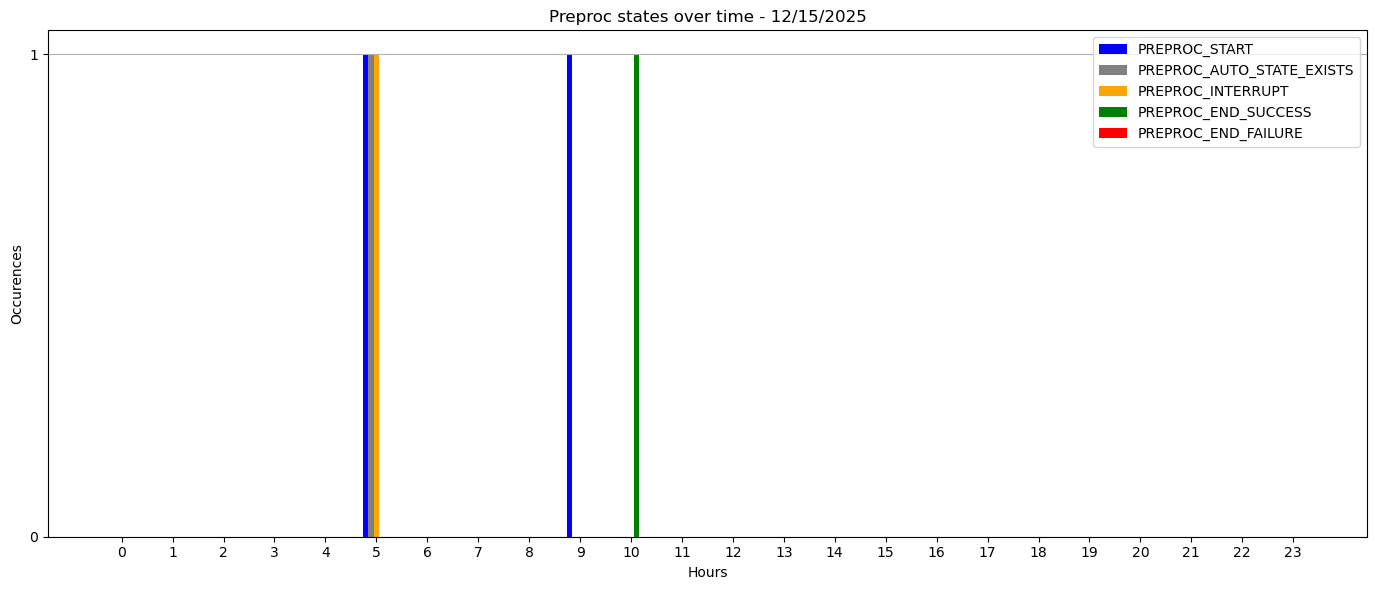

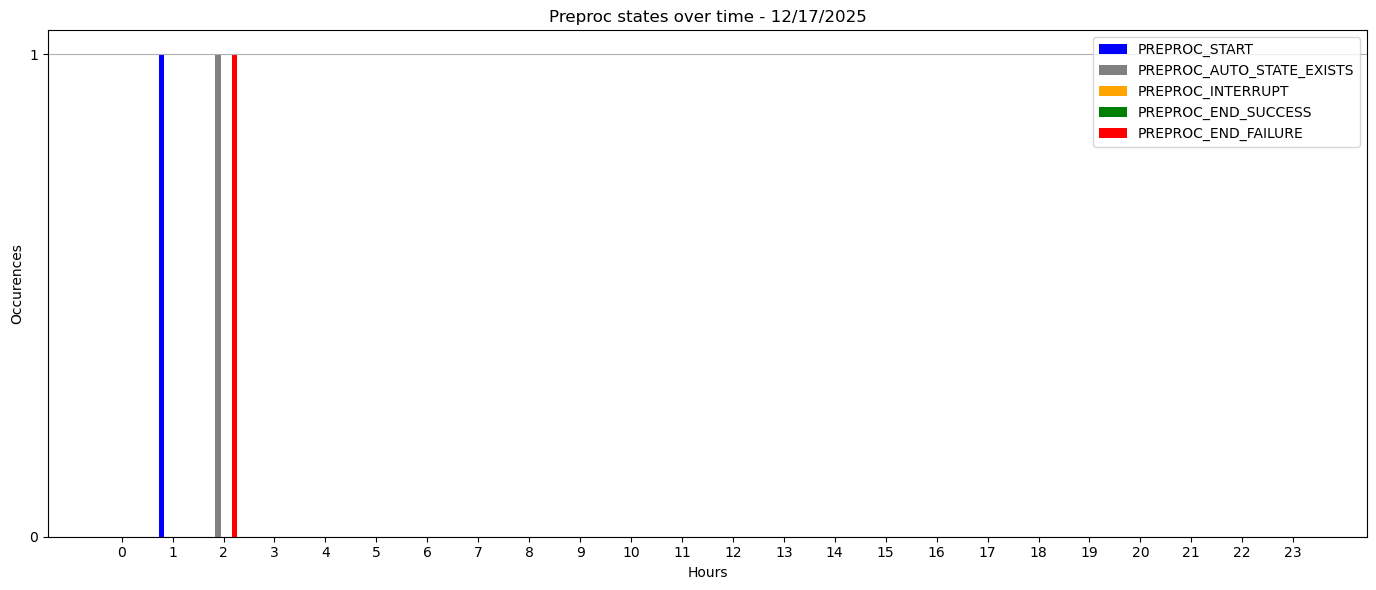

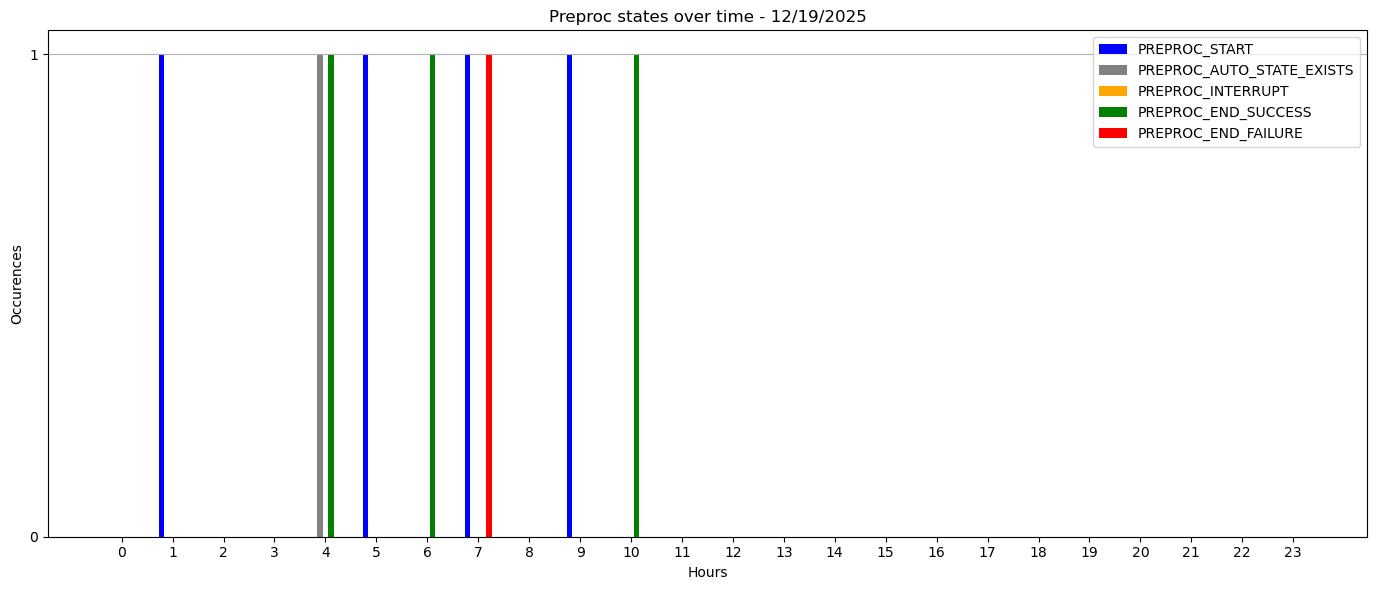

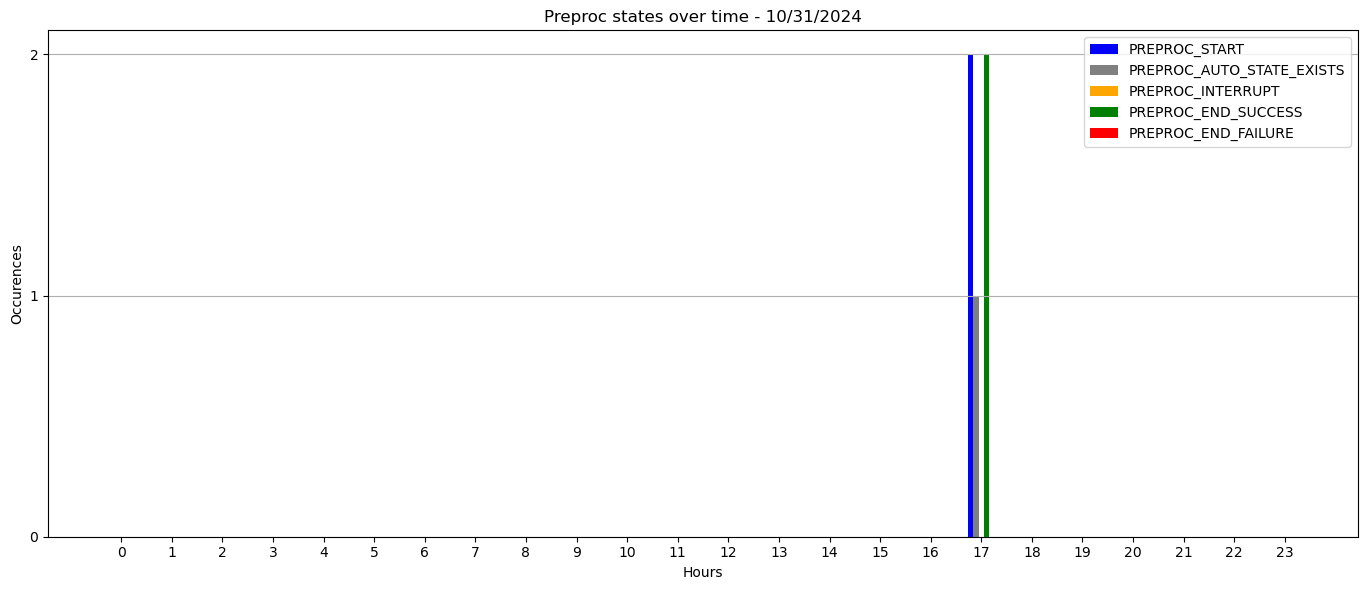

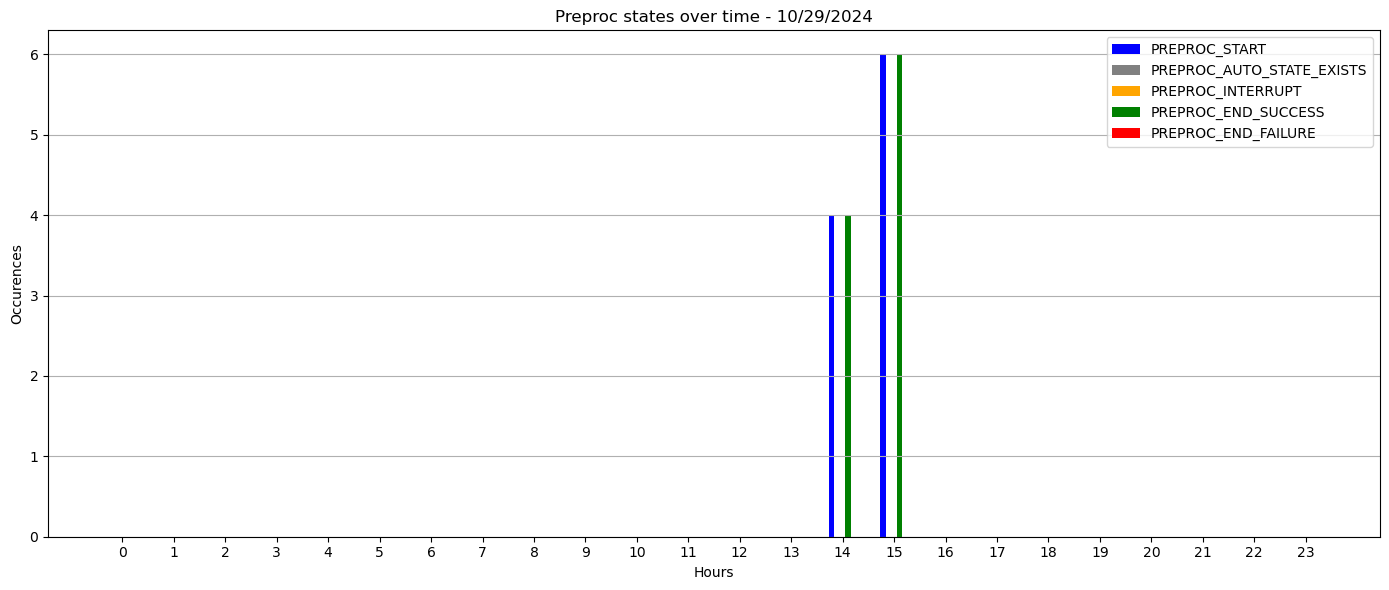

In [8]:
# Count the number of preproc_states occurences over time for each day
for day in day_list: 
    preproc_day = day
    preproc_per_hour = {}
    for n in state_list:
        preproc_per_hour[n] = [0] * 24   # Number of hours in a day
    for element in preproc_state_and_time:
        if preproc_day in element:
            preproc_state = element[-1]
            preproc_hour = element[1]
            preproc_per_hour[preproc_state][preproc_hour] += 1
    print()
    # Draw the graph 
    draw_graph(preproc_day, preproc_per_hour)